In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

DATA_URL = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(DATA_URL, index_col=[0])
df.head()

def sales_format(num):
  last = len(num) - 1
  try:
    return float(num) * 1000000
  except:
    if num[last] == 'M':
      return float(num[:last]) * 1000000
    elif num[last] == 'K':
      return float(num[:last]) * 1000
    else:
      raise Exception(num)
      
def years_format(year):
  if year > 1900:
    return year
  elif year <= 21:
    return year + 2000
  elif year < 100:
    return year + 1900
  else:
    return 0

regions = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for sales in regions:
  df[sales] = df[sales].apply(sales_format)
df['Year'] = df['Year'].apply(years_format)

In [366]:
p = df[['Genre', *regions]].groupby('Genre').sum()
stats.chi2_contingency(p, correction=False)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


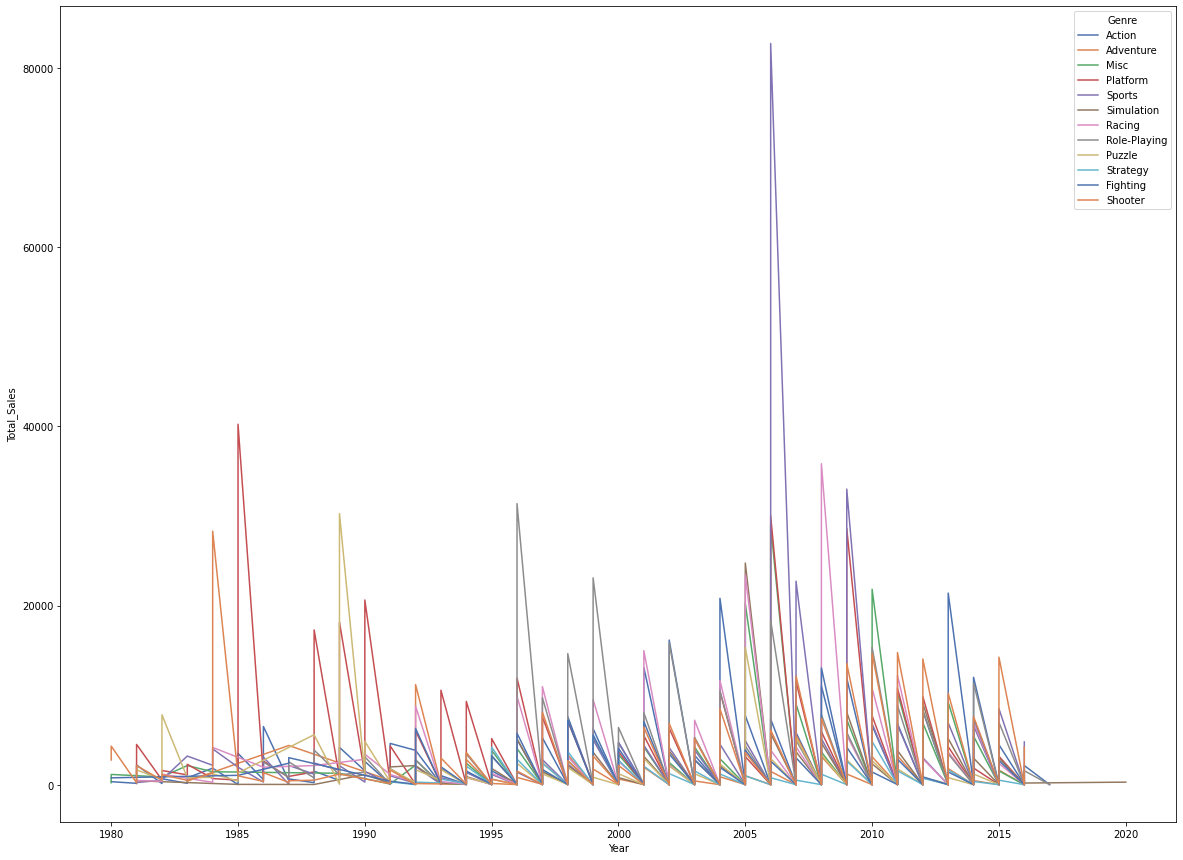

In [374]:
df['Total_Sales'] = (df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']) / 1000
df_trend = df[['Total_Sales', 'Year', 'Genre']]
df_trend = df_trend[df_trend['Year'] != 0]

plt.figure(figsize=(20,15))
sns.lineplot(data=df_trend, x="Year", y="Total_Sales", hue="Genre", estimator=None, palette='deep');